<a href="https://colab.research.google.com/github/silvacaio/Desafio_DataScience/blob/main/Desafio_item5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Importando libs

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt  
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import recall_score 
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold

### Importação de dados e primeiras infos

In [ ]:
df = pd.read_excel('https://github.com/silvacaio/Desafio_DataScience/raw/main/teste_smarkio_lbs.xls', sheet_name = 'Análise_ML')

df.head()

,Pred_class,probabilidade,status,True_class
0,2,0.079892,approved,0.0
1,2,0.379377,approved,74.0
2,2,0.379377,approved,74.0
3,2,0.420930,approved,74.0
4,2,0.607437,approved,NaN


In [ ]:
#conhecendo a estrutura do dataset
df.shape

(643, 4)

In [ ]:
#tipo das colunas
df.dtypes

Pred_class         int64
probabilidade    float64
status            object
True_class       float64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643 entries, 0 to 642
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pred_class     643 non-null    int64  
 1   probabilidade  643 non-null    float64
 2   status         643 non-null    object 
 3   True_class     181 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 20.2+ KB


Possível observar que a coluna 'True_class' contém muitos valores faltantes

In [ ]:
df.describe()

,Pred_class,probabilidade,True_class
count,643.000000,643.000000,181.000000
mean,52.712286,0.622436,38.574586
std,37.602068,0.266811,39.581017
min,2.000000,0.043858,0.000000
25%,12.000000,0.408017,0.000000
50%,59.000000,0.616809,24.000000
75%,81.000000,0.870083,74.000000
max,118.000000,1.000000,117.000000


Através da estatistica descritiva, acima, já é possível observar uma "inconsistencia" nestes dados uma vez que os valores limites (min e max) da coluna 'Pred_class' não existem na coluna 'True_class'

In [ ]:
#confirmando que somente a coluna 'True_class' contém missing values
df.columns[df.isnull().any()]

Index(['True_class'], dtype='object')

In [ ]:
qtdTotal = len(df)
qtdWithClassification = len(df[df.True_class.isnull() == False])
qtdWithoutClassification = len(df[df.True_class.isnull() == True])
qtdCorrectPredicted = len(df[df.True_class == df.Pred_class])
percWithoutClassification = round(qtdWithoutClassification * 100 / qtdTotal, 2)
print(f'Quantidade de itens: {qtdTotal}')
print(f'Quantidade de itens classificados: {qtdWithClassification}')
print(f'Quantidade de itens sem classificação: {percWithoutClassification}%')
print(f'% de itens sem classificação: {qtdWithoutClassification}')
print(f'Quantidade de itens preditos corretamente: {qtdCorrectPredicted}')

Quantidade de itens: 643
Quantidade de itens classificados: 181
Quantidade de itens sem classificação: 71.85%
% de itens sem classificação: 462
Quantidade de itens preditos corretamente: 0


Destaca-se nesta análise inicial que dos itens que contém a "classe verdadeira" (True_class) NENHUM foi classificado corretamente.

In [ ]:
df_withClass = df[df.True_class.isnull() == False]

In [ ]:
len(df_withClass[df_withClass['status'] == 'revision'])

0

In [ ]:
accuracy_score(df_withClass['True_class'], df_withClass['Pred_class'])

0.0

É possível observar e confirmar que a acurácia dos itens com  a "classe verdadeira" (True_class) é de 0%

In [ ]:
df_withoutClass = df[df.True_class.isnull()]

In [ ]:
len(df_withoutClass[df_withoutClass['status'] == 'revision'])

43

Outro fator observado nesta análise inicial é de que TODOS os registros com status igual a revision estão SEM valor na coluna "True_class". por isso, após a etapa de popular os registros faltantes com os valores da coluna "Pred_class", TODOS os dados ficarão com o dado exatamente igual em ambas as colunas. Isto pode ser um fator de enviesamento, na etapa de criação de uma novo modelo.

##EDA - Exploratory Data Analysis


In [ ]:
df_ajusted = df.copy()

In [ ]:
#conforme orientações do teste, quando a 'True_class' for nula ela deve assumir o valor da coluna 'Pred_class'
df_ajusted['True_class'] = df_ajusted['True_class'].fillna(df['Pred_class'])

In [ ]:
#confirmando que não tem mais colunas com valores nulls
df_ajusted.columns[df_ajusted.isnull().any()]

Index([], dtype='object')

In [ ]:
qtdRealClass = df_ajusted.True_class.nunique()
qtdPredictedClass = df_ajusted.Pred_class.nunique()

print(f'Quantidade de classes (reais): {qtdRealClass}')
print(f'Quantidade de classes (preditas): {qtdPredictedClass}')

print(f'Este modelo realizou a predição de {qtdPredictedClass} classes, porém é possível observar que só existem {qtdRealClass}. Ou seja, o modelo fez a predição de {qtdPredictedClass - qtdRealClass} que não existem.' )

Quantidade de classes (reais): 73
Quantidade de classes (preditas): 80
Este modelo realizou a predição de 80 classes, porém é possível observar que só existem 73. Ou seja, o modelo fez a predição de 7 que não existem.


In [ ]:
predictNotExist = []
realClasses = df_ajusted.True_class.unique()
for pred in df.Pred_class.unique(): 
  if pred not in realClasses:
    predictNotExist.append(pred)

print(f'As seguintes classes foram preditas, porém não existem:{predictNotExist}') 

As seguintes classes foram preditas, porém não existem:[33, 50, 64, 109, 49, 31, 21, 95, 105]


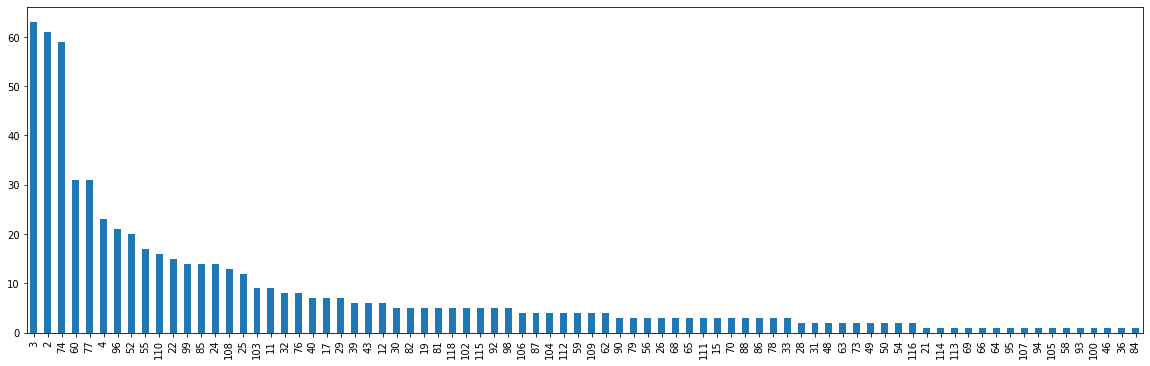

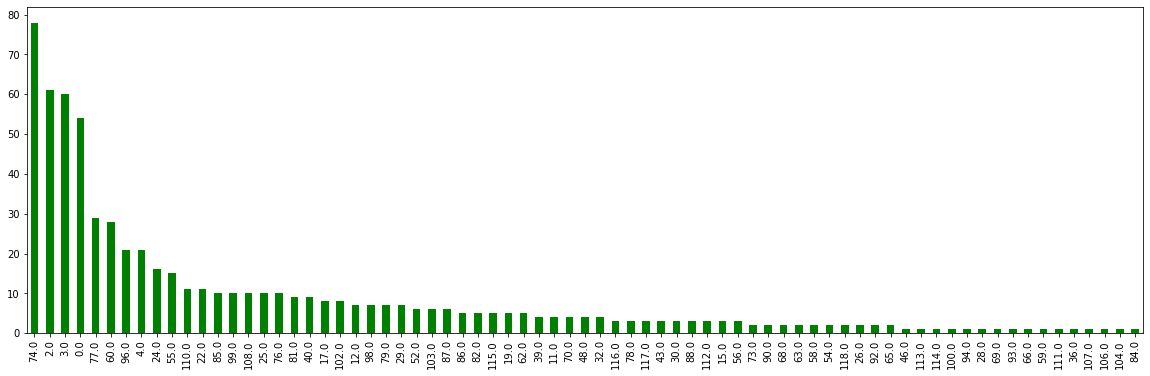

In [ ]:
#visualização da quantidade de classes preditas e classes reais
plt.figure(figsize=(20, 6))
df_ajusted['Pred_class'].value_counts().plot.bar()
plt.show()
plt.figure(figsize=(20, 6))
df_ajusted['True_class'].value_counts().plot.bar(color='green')
plt.show()

In [ ]:
print(f"""Top 5 Pred_class: 
{df_ajusted['Pred_class'].value_counts().head(5)}""")
print(f"""Top 5 True_class:
{df_ajusted['True_class'].value_counts().head(5)}""")


Top 5 Pred_class: 
3     63
2     61
74    59
60    31
77    31
Name: Pred_class, dtype: int64
Top 5 True_class:
74.0    78
2.0     61
3.0     60
0.0     54
77.0    29
Name: True_class, dtype: int64


In [ ]:
len(df_ajusted[df_ajusted['Pred_class'] == 0])

0

In [ ]:
df_ajusted[df_ajusted['True_class'] == 0]['Pred_class'].value_counts()

52     14
32      4
110     3
59      3
86      2
2       2
50      2
3       2
109     2
99      2
60      1
19      1
74      1
77      1
11      1
22      1
21      1
31      1
90      1
92      1
30      1
33      1
39      1
104     1
43      1
48      1
85      1
64      1
Name: Pred_class, dtype: int64

Podemos observar que dos top 5 de classes reais 'True_class', a única que não apareceu com um número próximo de classes preditas foi o classe 0. 
A classe 0 é uma classe muito presente no 'True_class', porém não exista na coluna 'Pred_class'.

Não é possível inferir algo significativo do gráfico de correlações destes dados. 

Text(0.5, 1.0, 'Contagem de status')

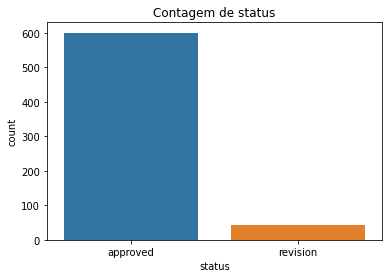

In [ ]:
sns.countplot(x = df_ajusted.status)
plt.title('Contagem de status')

Possível observar um grande desbalanceamento entre estes itens, podendo ter um impacto negativo na criação de uma novo modelo de classificação. Uma possível solução, seria a aplicação das técnicas de oversampling or undersampling.

Text(0.5, 1.0, 'Distribuição do status')

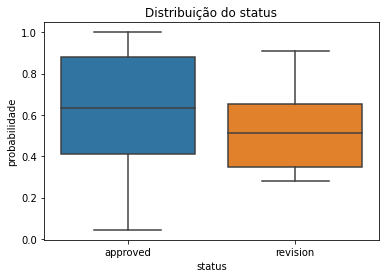

In [ ]:
sns.boxplot(data=df_ajusted,
            x='status',
            y='probabilidade',)
plt.title("Distribuição do status")

In [ ]:
df_ajusted[df_ajusted['status'] == 'approved'].describe().T

,count,mean,std,min,25%,50%,75%,max
Pred_class,600.0,53.545000,37.796944,2.000000,12.000000,60.000000,82.000000,118.0
probabilidade,600.0,0.629549,0.270583,0.043858,0.411801,0.635104,0.881497,1.0
True_class,600.0,48.765000,38.881651,0.000000,3.000000,60.000000,77.000000,118.0


In [ ]:
df_ajusted[df_ajusted['status'] == 'revision'].describe().T

,count,mean,std,min,25%,50%,75%,max
Pred_class,43.0,41.093023,33.013571,2.000000,14.500000,32.000000,60.000000,114.000000
probabilidade,43.0,0.523184,0.182102,0.278516,0.345885,0.511118,0.654347,0.909148
True_class,43.0,41.093023,33.013571,2.000000,14.500000,32.000000,60.000000,114.000000


Através do gráfico de boxplot podemos observar a distribuições dos dados dentro dos percentis. 

*   Para o status 'approved' os dados de probabilidade se concentram na faixa entre 0.411801 e 0.881497.
*   Para o status 'revision' os dados de probabilidade se concentram na faixa entre 0.345885 e 0.654347.




##Validação do modelo original (métricas)

In [ ]:
confusion_matrix(df_ajusted.Pred_class, df_ajusted.True_class)

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 2, 47,  1, ...,  0,  0,  0],
       [ 2,  0, 50, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  2,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  2]])

Text(0.5, 1.0, 'Matriz de Confusão')

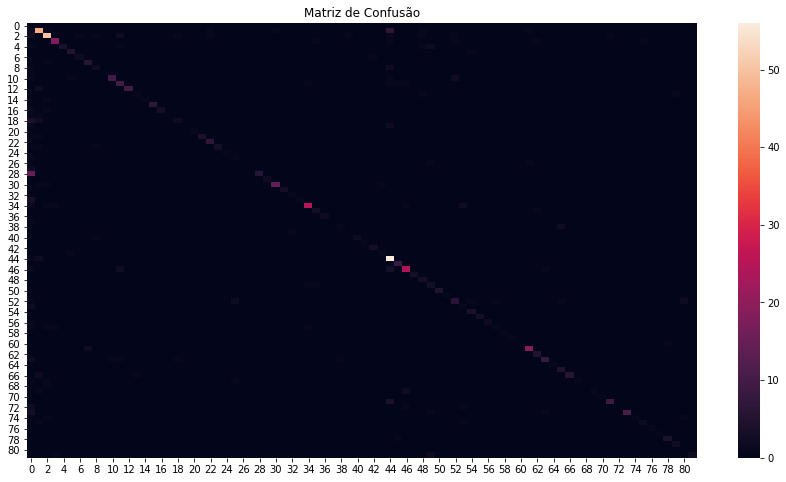

In [ ]:
plt.figure(figsize = (15, 8))
sns.heatmap(confusion_matrix(df_ajusted.Pred_class, df_ajusted.True_class))
plt.title('Matriz de Confusão')

Através da matriz de confusão, podemos observar a diagonal principal onde os pontos mais claros representam a quantidade de acertos do modelo para determinada classe. Ou seja, quanto mais claro estiver o ponto, na diagonal principal, melhor qualidade do nosso modelo.

No início desta análise observamos que inicialmente, com os valores nulos, não existia nenhuma classe predita corretamente. Conforme orientações do teste, assumimos que o valor da coluna 'Pred_class' estava correto.
Desta maneira, podemos inferir que a porcentagem de registros que INICIALMENTE estavam sem classificação, 71.85%, representa também a acurácia deste modelo. Podemos confirmar isso com a aplicação da função abaixo:

In [ ]:
print(f'Percentual de registros inicialmente sem classificação: {percWithoutClassification}')
print(f"Acurácia do modelo: {round(accuracy_score(df_ajusted['True_class'], df_ajusted['Pred_class']) * 100, 2)}")

Percentual de registros inicialmente sem classificação: 71.85
Acurácia do modelo: 71.85


Utilizamos o recall como forma de avaliar o quão bom este modelo é em identificar os possíveis casos positivos:

In [ ]:
recall_score(df_ajusted['True_class'], df_ajusted['Pred_class'], average='macro', zero_division=0)

0.6997739858971228

Na "precision" os falsos positivos são utilizados como conforma de "punição", a fim de apresentar dentro do que foi classificado como positivo, o que de fato é positivo.

In [ ]:
precision_score(df_ajusted['True_class'], df_ajusted['Pred_class'], average='macro', zero_division=0)

0.6286648904994168

Report com as métricas para cada uma das classes:

In [ ]:
print(classification_report(df_ajusted['True_class'], df_ajusted['Pred_class'], zero_division=0))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        54
         2.0       0.77      0.77      0.77        61
         3.0       0.79      0.83      0.81        60
         4.0       0.78      0.86      0.82        21
        11.0       0.44      1.00      0.62         4
        12.0       0.83      0.71      0.77         7
        15.0       0.67      0.67      0.67         3
        17.0       0.86      0.75      0.80         8
        19.0       0.40      0.40      0.40         5
        21.0       0.00      0.00      0.00         0
        22.0       0.67      0.91      0.77        11
        24.0       0.71      0.62      0.67        16
        25.0       0.83      1.00      0.91        10
        26.0       0.33      0.50      0.40         2
        28.0       0.50      1.00      0.67         1
        29.0       1.00      1.00      1.00         7
        30.0       0.60      1.00      0.75         3
        31.0       0.00    

##Criação de novo modelo

Conforme as orientações:



*   Dados com status "approved" serão utilizados para treinamento
*   Dados com status "revision" serão os dados a ser previstos



In [ ]:
#separar os dados em revision e approved
df_new_model = df_ajusted.copy()

In [ ]:
df_new_model['Ok'] = (df_new_model['Pred_class'] == df_new_model['True_class']).astype(int)

In [ ]:
df_approved = df_new_model[df_new_model['status'] == 'approved']
df_approved.tail(5)

,Pred_class,probabilidade,status,True_class,Ok
595,74,0.432421,approved,74.0,1
596,82,0.590576,approved,82.0,1
597,92,0.915543,approved,92.0,1
598,96,0.334495,approved,96.0,1
599,99,0.373226,approved,22.0,0


In [ ]:
len(df_approved)

600

In [ ]:
df_revision  = df_new_model[df_new_model['status'] == 'revision']

df_revision.tail(5)

,Pred_class,probabilidade,status,True_class,Ok
638,60,0.543772,revision,60.0,1
639,60,0.553846,revision,60.0,1
640,77,0.606065,revision,77.0,1
641,84,0.561842,revision,84.0,1
642,96,0.340740,revision,96.0,1


In [ ]:
len(df_revision)

43

In [ ]:
qtdCorrectRevisionBefore = len(df_revision[df_revision['Ok'] == 1])

### testando algoritmos de *classificação*

In [ ]:
X = df_approved[['Pred_class', 'probabilidade']]
target = df_approved['Ok']

In [ ]:
def scores_model(model, X, y, folds):
# # # prepare cross validation
 accuracies = []
 precisions = []
 recalls = []
 
 kfold = KFold(folds)
# # # # enumerate splits
 for train_index, test_index in kfold.split(X):
       X_train, X_test, y_train, y_test = X.values[train_index], X.values[test_index], y.values[train_index],  y.values[test_index]
       model.fit(X_train, y_train)
       predictions = model.predict(X_test)

       accuracies.append(accuracy_score(y_test, predictions))
       precisions.append(precision_score(y_test, predictions))
       recalls.append(recall_score(y_test, predictions))

 print('Mean Accuracy score:', np.mean(accuracies))
 print('Mean Precision score:',np.mean(precisions))
 print('Mean Recall score:', np.mean(recalls))
       

In [ ]:
from sklearn.naive_bayes import GaussianNB
modelNaiveBayes = GaussianNB()

scores_model(modelNaiveBayes, X, target, 6)

Mean Accuracy score: 0.71
Mean Precision score: 0.7860282541218083
Mean Recall score: 0.8110341909742793


In [ ]:
from sklearn.ensemble import RandomForestClassifier

random = RandomForestClassifier(n_estimators=100)
scores_model(random, X, target, 6)

Mean Accuracy score: 0.7716666666666666
Mean Precision score: 0.8182947262434693
Mean Recall score: 0.8684015369163572


In [ ]:
from sklearn.tree import DecisionTreeClassifier 

tree = DecisionTreeClassifier()
scores_model(tree, X, target, 6)

Mean Accuracy score: 0.7533333333333334
Mean Precision score: 0.8241821366821367
Mean Recall score: 0.8232052941297212


### Executando o algoritmo escolhido

In [ ]:
#criando o modelo
random.fit(X, target)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#executando o modelo
XPredict = df_revision[['Pred_class', 'probabilidade']]
predict = random.predict(XPredict)

In [ ]:
del df_revision['Ok']

In [ ]:
df_revision = df_revision.assign(Ok=predict)

In [ ]:
print(f'Antes de executar o modelo de predição, {qtdCorrectRevisionBefore} registros eram considerados corretos.')
print(f'Após a execução do modelo de predição, {len(df_revision[df_revision["Ok"] == 1])} registros foram classificados como corretos.')

print(f'Não é possível afirmar a verecidade desta primeira afirmação! Como demonstrado no início desta análise, TODOS os registros com status igual a revision estavam SEM valor na coluna "True_class". por isso, após a etapa de popular os registros faltantes com os valores da coluna "Pred_class", TODOS os dados ficaram com o dado exatamente igual.')

Antes de executar o modelo de predição, 43 registros eram considerados corretos.
Após a execução do modelo de predição, 34 registros foram classificados como corretos.
Não é possível afirmar a verecidade desta primeira afirmação! Como demonstrado no início desta análise, TODOS os registros com status igual a revision estavam SEM valor na coluna "True_class". por isso, após a etapa de popular os registros faltantes com os valores da coluna "Pred_class", TODOS os dados ficaram com o dado exatamente igual.
